## Implementation of Perceptron algprithm in Python from scratch

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from numpy.linalg import norm

### Create datasets
I have created 2 datasets
- Data that is not linearly separable (hence Percemptron algorithm wouldnt be able to seperate out the 2 classes)
- Data linearly separable (Perceptron will be able to separate the classes)

In [224]:
X1, Y1 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant = 0, shift = 0.0, scale = 1.0, random_state = 75)
X2, Y2 = make_blobs(n_samples=100, n_features=2, centers = ([5,9], [15,15]), random_state = 75)

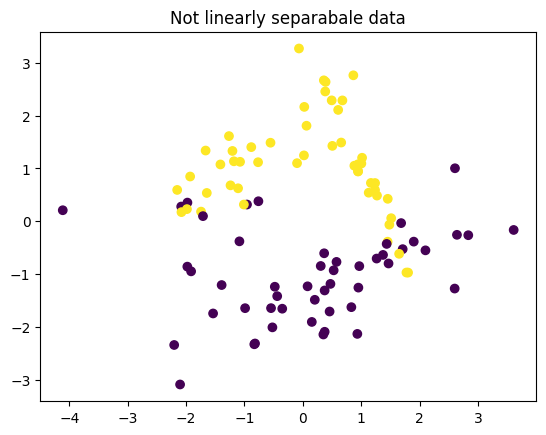

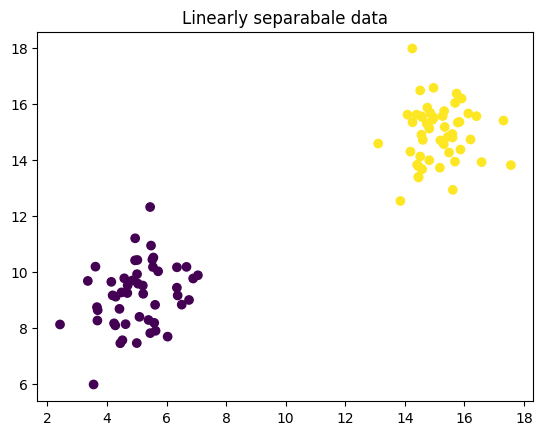

In [249]:
plt.scatter(X1[:,0], X1[:,1], c = Y1);
plt.title("Not linearly separabale data")
plt.show()
print()
plt.scatter(X2[:,0], X2[:,1], c = Y2);
plt.title("Linearly separabale data")
plt.show()

In [248]:
class Perceptron:

  def __init__(self):
    self.w = None

  def model(self, x, w):
    """
    Return binary output for an array x based on a perceptron weight w
    """
    return (np.dot(x, w) >= 0).astype(int)

  def fit(self, X,Y, epochs = 200, lr = 1):
    """"
    Fits the algorithm on a data. Does not return anything
    """
    X = np.c_[np.ones(X.shape[0]), X]
    X = X/norm(X, axis = 1, keepdims = True)
    curr_w = X[Y == 1].sum(axis=0) - X[Y == 0].sum(axis=0)
    curr_w = curr_w/norm(curr_w)
    for epoch in range(epochs):
      for (x, y) in zip(X,Y):
        curr_pred = self.model(x, curr_w)
        if curr_pred > y:
          curr_w -= lr*x
        elif curr_pred < y:
          curr_w += lr*x
        #curr_w = curr_w/norm(curr_w)
    self.w = curr_w

  def predict(self,X):
    """
    Predicts the output for an input array
    """
    return self.model(X, self.w)

  def score(self, X, Y):
    """
    Returns fraction of correct classifications
    """
    X = np.c_[np.ones(X.shape[0]), X]
    return (1 - np.abs(self.predict(X) - Y)).sum()/len(Y)

  def plot_decision_boundary(self,X, Y, data_label):
    """
    Plots decision boundary on top of the input data. This works only for 2D inputs
    """
    X = np.c_[np.ones(X.shape[0]), X]
    denom = self.w[2]
    multiplier = 1
    while int(denom//10) == 0:
      multiplier *= 10
      denom  = denom *multiplier
    w = self.w*multiplier*10
    plt.scatter(X[:, 1], X[:, 2], c = Y)
    X_axis = np.linspace(X[:, 1].min(), X[:,1].max(), 30)
    plt.plot(X_axis, (-w[1]*X_axis - w[0])/w[2])
    plt.title(f"Decision boundary for {data_label} data")
    plt.show()

## Apply the algorithm on non-linearly separable data

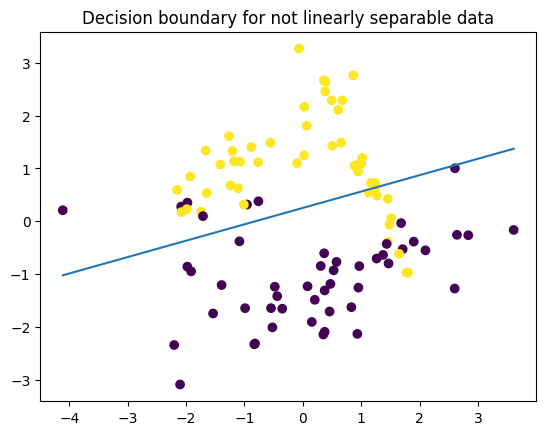

In [245]:
clf1 = Perceptron()
clf1.fit(X1, Y1)
clf1.score(X1,Y1)
clf1.plot_decision_boundary(X1, Y1, 'not linearly separable')

## Apply algorithm on linearly separable data

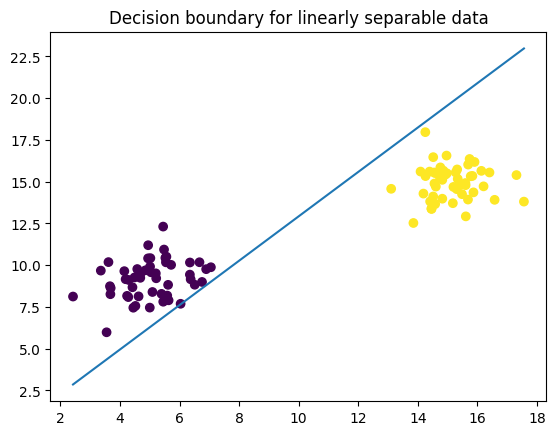

In [246]:
clf2 = Perceptron()
clf2.fit(X2, Y2)
clf2.score(X2,Y2)
clf2.plot_decision_boundary(X2, Y2, 'linearly separable')